## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_charity = application_df.drop(columns=["EIN", "NAME"])
df_charity

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
df_charity.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_df = df_charity["APPLICATION_TYPE"].value_counts()

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_df[app_df < 200].index) 


# Replace in dataframe
for app in application_types_to_replace:
    df_charity['APPLICATION_TYPE'] = df_charity['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df_charity['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
cls = df_charity["CLASSIFICATION"].value_counts()
cls

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1728        1
C5200        1
C2570        1
C2600        1
C4200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

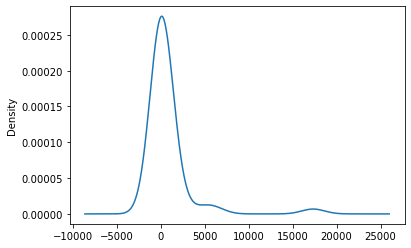

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
(cls[cls > 1]).plot.density()

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = df_charity["CLASSIFICATION"].value_counts()
classifications_to_replace = classifications_to_replace.loc[classifications_to_replace<1500].index.values


# Replace in dataframe
for cls in classifications_to_replace:
    df_charity['CLASSIFICATION'] = df_charity['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df_charity['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [18]:
classifications_to_replace

array(['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800',
       'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300',
       'C1240', 'C8000', 'C7120', 'C1500', 'C6000', 'C1800', 'C1250',
       'C8200', 'C1278', 'C1238', 'C1237', 'C1235', 'C7210', 'C4100',
       'C2400', 'C1720', 'C1600', 'C1257', 'C2710', 'C0', 'C1260',
       'C1267', 'C1246', 'C1234', 'C1256', 'C3200', 'C1248', 'C2150',
       'C3700', 'C1732', 'C1236', 'C1370', 'C1580', 'C8210', 'C1283',
       'C2500', 'C4500', 'C1900', 'C2190', 'C1570', 'C2170', 'C6100',
       'C1245', 'C2561', 'C1820', 'C4120', 'C2380', 'C1728', 'C5200',
       'C2570', 'C2600', 'C4200'], dtype=object)

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df_charity)

In [10]:
list(dummies.columns)

['STATUS',
 'ASK_AMT',
 'IS_SUCCESSFUL',
 'APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_

In [11]:
# Split our preprocessed data into our features and target arrays
y= dummies["IS_SUCCESSFUL"].values
X= dummies.drop(columns= ["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=24)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 352       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 435us/step - loss: 0.6291 - accuracy: 0.6852
Epoch 2/100
804/804 [==============================] - 0s 445us/step - loss: 0.5818 - accuracy: 0.7051
Epoch 3/100
804/804 [==============================] - 0s 442us/step - loss: 0.5710 - accuracy: 0.7127
Epoch 4/100
804/804 [==============================] - 0s 437us/step - loss: 0.5610 - accuracy: 0.7258
Epoch 5/100
804/804 [==============================] - 0s 437us/step - loss: 0.5588 - accuracy: 0.7272
Epoch 6/100
804/804 [==============================] - 0s 437us/step - loss: 0.5573 - accuracy: 0.7282
Epoch 7/100
804/804 [==============================] - 0s 436us/step - loss: 0.5558 - accuracy: 0.7283
Epoch 8/100
804/804 [==============================] - 0s 436us/step - loss: 0.5547 - accuracy: 0.7280
Epoch 9/100
804/804 [==============================] - 0s 436us/step - loss: 0.5540 - accuracy: 0.7275
Epoch 10/100
804/804 [==============================] - 0s 435us/step - l

804/804 [==============================] - 0s 446us/step - loss: 0.5452 - accuracy: 0.7324
Epoch 80/100
804/804 [==============================] - 0s 440us/step - loss: 0.5452 - accuracy: 0.7325
Epoch 81/100
804/804 [==============================] - 0s 446us/step - loss: 0.5452 - accuracy: 0.7324
Epoch 82/100
804/804 [==============================] - 0s 456us/step - loss: 0.5453 - accuracy: 0.7328
Epoch 83/100
804/804 [==============================] - 0s 442us/step - loss: 0.5452 - accuracy: 0.7317
Epoch 84/100
804/804 [==============================] - 0s 445us/step - loss: 0.5450 - accuracy: 0.7327
Epoch 85/100
804/804 [==============================] - 0s 441us/step - loss: 0.5454 - accuracy: 0.7319
Epoch 86/100
804/804 [==============================] - 0s 445us/step - loss: 0.5451 - accuracy: 0.7332
Epoch 87/100
804/804 [==============================] - 0s 448us/step - loss: 0.5452 - accuracy: 0.7323
Epoch 88/100
804/804 [==============================] - 0s 438us/step - loss:

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5536 - accuracy: 0.7251
Loss: 0.5535620450973511, Accuracy: 0.7251312136650085


In [17]:
# Export our model to HDF5 file
from keras.models import load_model

nn.save('AlphabetSoupCharity.h5')  
# del nn  

# returns a compiled model
# identical to the previous one
# model = load_model('AlphabetSoupCharity.h5')